# Weekly Activity
1. Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

In [2]:
import sys
assert sys.version_info >=(3,7)

import numpy as np
import cv2 as cv
from util_func  import *

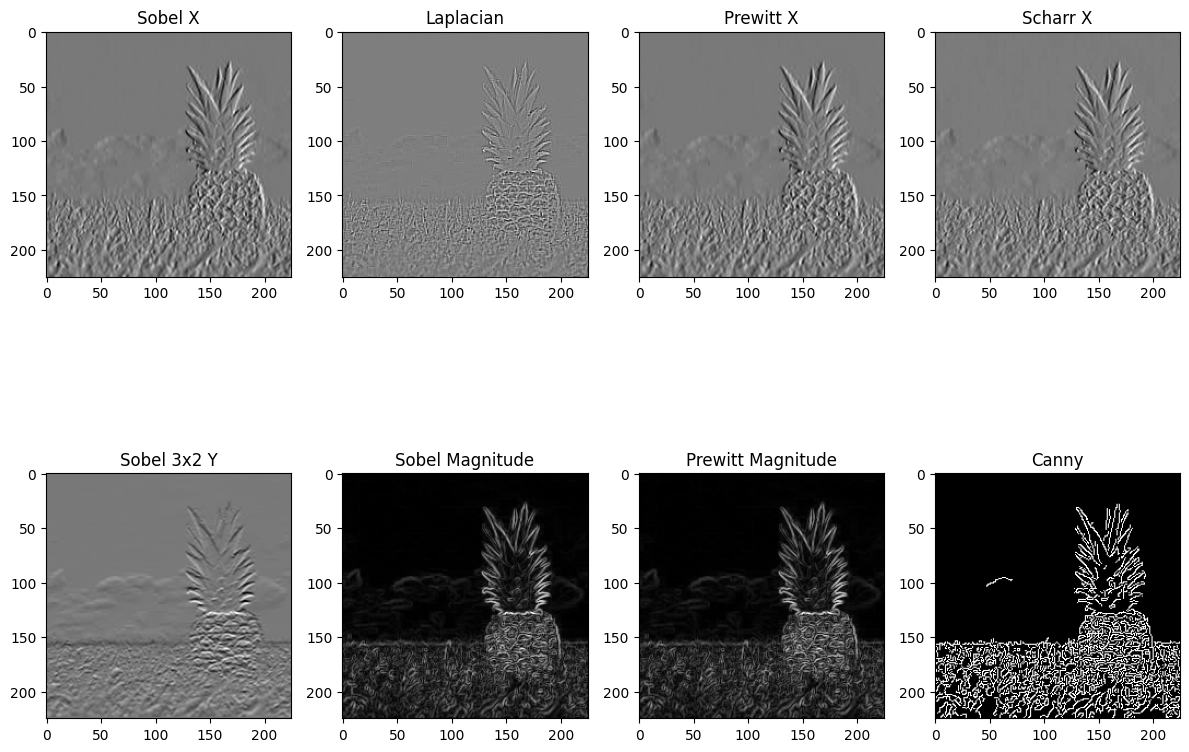

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/pineapple.jfif', cv2.IMREAD_GRAYSCALE)

# Apply different edge detectors
edge_sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
edge_sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
edge_sobel = np.sqrt(edge_sobel_x**2 + edge_sobel_y**2)

edge_laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)

edge_prewitt_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
edge_prewitt_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
edge_prewitt = np.sqrt(edge_prewitt_x**2 + edge_prewitt_y**2)

edge_scharr_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=-1)  # Corrected ksize for Scharr
edge_scharr_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=-1)  
edge_scharr = np.sqrt(edge_scharr_x**2 + edge_scharr_y**2)

edge_sobel_32 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Additional Sobel filter

# Display the results
plt.figure(figsize=(12, 10))

plt.subplot(2, 4, 1), plt.imshow(edge_sobel_x, cmap='gray'), plt.title('Sobel X')
plt.subplot(2, 4, 2), plt.imshow(edge_laplacian, cmap='gray'), plt.title('Laplacian')
plt.subplot(2, 4, 3), plt.imshow(edge_prewitt_x, cmap='gray'), plt.title('Prewitt X')
plt.subplot(2, 4, 4), plt.imshow(edge_scharr_x, cmap='gray'), plt.title('Scharr X')
plt.subplot(2, 4, 5), plt.imshow(edge_sobel_32, cmap='gray'), plt.title('Sobel 3x2 Y')
plt.subplot(2, 4, 6), plt.imshow(edge_sobel, cmap='gray'), plt.title('Sobel Magnitude')
plt.subplot(2, 4, 7), plt.imshow(edge_prewitt, cmap='gray'), plt.title('Prewitt Magnitude')
plt.subplot(2, 4, 8), plt.imshow(edge_canny, cmap='gray'), plt.title('Canny')

plt.tight_layout()
plt.show()

2. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw bounding boxes on the objects.

In [15]:
import cv2 as cv
import numpy as np

def identify_and_draw_laptop(image_path, min_laptop_area=10000):
    
    image = cv.imread(image_path)
    if image is None:
        print("Error: Could not read the image.")
        return
    
    # Convert the image to HSV color space
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    # Define the range of colors that represent the laptop
    lower_laptop_color = np.array([0, 0, 180])
    upper_laptop_color = np.array([180, 30, 255])

    # Create a binary mask using inRange for the laptop color
    laptop_mask = cv.inRange(hsv, lower_laptop_color, upper_laptop_color)

    # Find contours in the mask
    contours, _ = cv.findContours(laptop_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around the laptop
    for contour in contours:
        if cv.contourArea(contour) > min_laptop_area:
            x, y, w, h = cv.boundingRect(contour)
            cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image

result_image = identify_and_draw_laptop('images/electronic.jfif', min_laptop_area=10000)

if result_image is not None:
    cv.imshow('Laptop', result_image)
    cv.waitKey(0)
    cv.destroyAllWindows()

3. Isolate the clock with the aid of edge detection and contours' properties. The example result should be as follows: segmented_clock
 

In [17]:
import cv2 as cv
import numpy as np

def find_screen_contour(image_path, canny_min_threshold=50, canny_max_threshold=150):

    image = cv.imread(image_path)
    if image is None:
        print("Error: Could not read the image.")
        return None
    
    # Convert the image to grayscale
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edge_image = cv.Canny(image_gray, canny_min_threshold, canny_max_threshold)
    
    # Find contours in the edge image
    contours, _ = cv.findContours(edge_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    
    # Sort the detected contours by area in descending order
    sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)[:5]
    
    # Find the screen contour (assuming it's a quadrilateral)
    screen_contour = None
    for contour in sorted_contours:
        peri = cv.arcLength(contour, True)
        approx = cv.approxPolyDP(contour, 0.1 * peri, True)
        
        if len(approx) == 4:
            screen_contour = contour
            break
    
    return screen_contour

screen_contour = find_screen_contour('images/clock.jpg', canny_min_threshold=50, canny_max_threshold=150)

if screen_contour is not None:
    
    image = cv.imread(image_path)
    img_copy = image.copy()
    
    # Draw the screen contour on a copy of the image
    cv.drawContours(img_copy, [screen_contour], -1, (0, 255, 0), 2)

    cv.imshow('Screen Contour', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()